In [88]:
%matplotlib inline
# The code has been written to give the user basic understanding
# So pandas are intendedly not used here despite their huge importance
# The data has no nulls so missing value imputations need not to be done
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
plt.style.use('seaborn-whitegrid')
seed = 10
iris = load_iris()
features = iris.data.T
print (np.shape(features))
print ("target {0}".format(np.shape(iris.target)))

print(iris.feature_names)
print( iris.data[:5,:])

(4, 150)
target (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


## Exploratory Data Analysis

### Features Effect on Target Class in Combination of Two

Text(0,0.5,'sepal width (cm)')

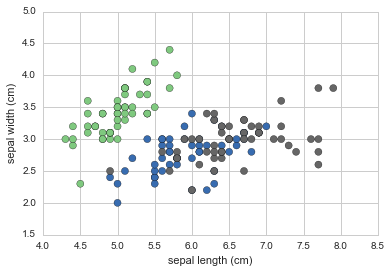

In [98]:

plt.scatter(features[0], features[1], c=iris.target, cmap="Accent", s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# the graph below shows that these 2 features are not going to be a good seperator 
#for determinging target class

Text(0,0.5,'petal length (cm)')

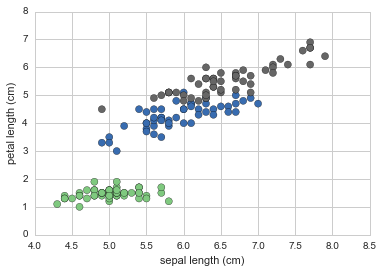

In [99]:
fig=plt.figure()
plt.scatter(features[0], features[2], c=iris.target, cmap="Accent", s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

Text(0,0.5,'petal width (cm)')

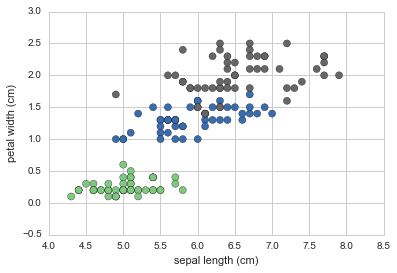

In [102]:
fig=plt.figure()
plt.scatter(features[0], features[3], c=iris.target, cmap="Accent", s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])

Text(0,0.5,'petal length (cm)')

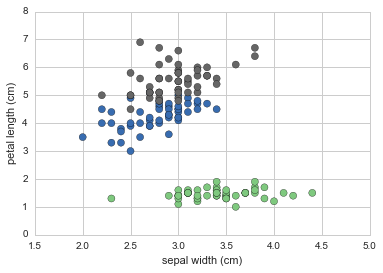

In [107]:
fig=plt.figure()
plt.scatter(features[1], features[2], c=iris.target, cmap="Accent", s=50)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])

Text(0,0.5,'petal width (cm)')

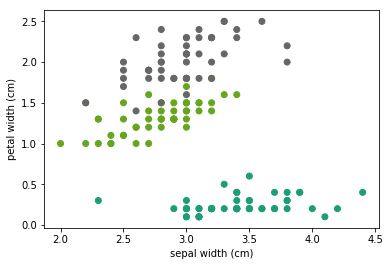

In [9]:
fig=plt.figure()
plt.scatter(features[1], features[3], c=iris.target, cmap="Dark2")
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])

Text(0,0.5,'petal width (cm)')

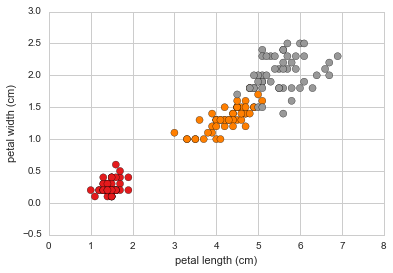

In [108]:
fig=plt.figure()
plt.scatter(features[2], features[3], c=iris.target, cmap="Set1", s=50)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

### Features Distribution

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

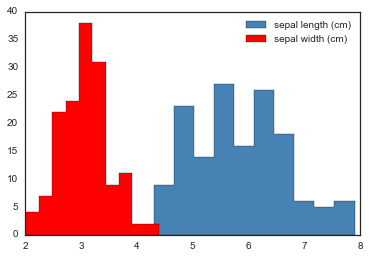

In [110]:
# Sepal length and Sepal Width shows somewhat Normal distribution.

plt.hist(iris.data[:,0], histtype = "stepfilled", color ="steelblue", edgecolor="black")
plt.legend(labels = iris.feature_names)
plt.hist(iris.data[:,1], histtype = "stepfilled", color ="red", edgecolor="black")
plt.legend(labels = iris.feature_names)
iris.feature_names

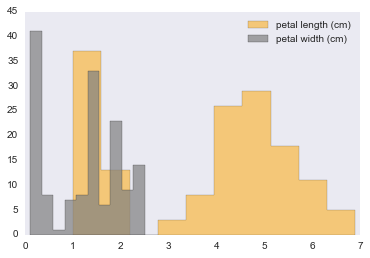

In [111]:
plt.style.use("seaborn-dark")
plt.hist(iris.data[:,2], histtype = "stepfilled", color ="orange", edgecolor="black", alpha =0.5)
plt.hist(iris.data[:,3], histtype = "stepfilled", color ="grey", edgecolor="black", alpha=0.7)
plt.legend(labels = np.array(iris.feature_names[2:]))


## Splitting data into training, test & validation set

In [113]:

features= iris.data
target = iris.target.T
print ("features shape {0} , target shape {1}".format(np.shape(features), np.shape(target)))



features shape (150, 4) , target shape (150,)


In [114]:
X_train, X_train_valid, y_train, y_train_valid = model_selection.train_test_split(features,target, random_state=seed)


In [115]:
print("X_train\n {0}\n, y_train\n{1}\n, X_train_valid\n{2}\n, y_train_valid\n{3}".format(X_train[:5,:],y_train[:5].T,X_train_valid[:5,:],y_train_valid[:5].T))

X_train
 [[ 7.7  2.6  6.9  2.3]
 [ 6.9  3.1  5.1  2.3]
 [ 5.   3.4  1.6  0.4]
 [ 5.   3.5  1.6  0.6]
 [ 5.2  2.7  3.9  1.4]]
, y_train
[2 2 0 0 1]
, X_train_valid
[[ 6.3  2.3  4.4  1.3]
 [ 6.4  2.7  5.3  1.9]
 [ 5.4  3.7  1.5  0.2]
 [ 6.1  3.   4.6  1.4]
 [ 5.   3.3  1.4  0.2]]
, y_train_valid
[1 2 0 1 0]


# Scikit-learn Machine Learning Models 

### Logistic Regression  with penalty L2 (Ridge Regression) & L1 (Lasso Regression)

In [116]:
# Model with default penalty L2

from sklearn.linear_model import LogisticRegression as LR
model=LR()
model.fit(X_train,y_train)
y_pred  = model.predict(X_train_valid)
print(y_pred)
print (y_train_valid)
print("Model Score is:{0}".format(model.score(X_train_valid, y_train_valid)))
sum=0

# Model Accuracy
for y_v,y_p in zip(y_train_valid, y_pred):
    sum = sum+1 if y_v== y_p else sum+0
Accuracy = sum /len(y_train_valid) *100

print("Manually testing prediction classes = {0} %".format(Accuracy))


[1 2 0 1 0 1 1 1 0 1 2 2 1 0 0 2 2 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Model Score is:0.9473684210526315
Manually testing prediction classes = 94.73684210526315 %


In [117]:
# Model with penalty L1

model=LR(penalty ="l1")
model.fit(X_train,y_train)
y_pred  = model.predict(X_train_valid)
print(y_pred)
print (y_train_valid)
print("\n\nModel Score is:{0}".format(model.score(X_train_valid, y_train_valid)))
sum=0

# Model Accuracy
for y_v,y_p in zip(y_train_valid, y_pred):
    sum = sum+1 if y_v== y_p else sum+0
Accuracy = sum /len(y_train_valid) *100

print("Manually testing prediction classes = {0} %".format(Accuracy))

[1 2 0 1 0 1 1 1 0 1 2 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]


Model Score is:0.9736842105263158
Manually testing prediction classes = 97.36842105263158 %


######  Clearly L2 penalty helped us in improving model accuracy

### Support Vector Machine - controlling Penalty through "C"

In [138]:
from sklearn import svm
model = svm.SVC(decision_function_shape='ovo',  kernel ='poly',C=0.00009)
model.fit(X_train,y_train)
y_pred  = model.predict(X_train_valid)

print(y_pred, "\n",y_train_valid)
# Model Accuracy
sum=0
for y_v,y_p in zip(y_train_valid, y_pred):
    sum = sum+1 if y_v== y_p else sum+0
Accuracy = sum /len(y_train_valid) *100

print("Manually testing prediction classes = {0} %".format(Accuracy))

[1 2 0 1 0 1 1 1 0 1 1 1 1 0 0 2 1 0 0 0 2 2 1 0 1 0 1 1 2 2 1 1 2 2 2 0 2
 2] 
 [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Manually testing prediction classes = 92.10526315789474 %


In [141]:
#Here kernel is RBF
from sklearn import svm
model = svm.SVC(decision_function_shape='ovo', C=1)
model.fit(X_train,y_train)
y_pred  = model.predict(X_train_valid)

print(y_pred, "\n",y_train_valid)
# Model Accuracy
sum=0
for y_v,y_p in zip(y_train_valid, y_pred):
    sum = sum+1 if y_v== y_p else sum+0
Accuracy = sum /len(y_train_valid) *100

print("Manually testing prediction classes = {0} %".format(Accuracy))

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2] 
 [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Manually testing prediction classes = 100.0 %


In [149]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA( solver ="lsqr", n_components=1)
model.fit(X_train,y_train)
y_pred  = model.predict(X_train_valid)

print(y_pred, "\n",y_train_valid)
# Model Accuracy
sum=0
for y_v,y_p in zip(y_train_valid, y_pred):
    sum = sum+1 if y_v== y_p else sum+0
Accuracy = sum /len(y_train_valid) *100

print("Manually testing prediction classes = {0} %".format(Accuracy))
# This irirs dataset is too simple for LDA

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2] 
 [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Manually testing prediction classes = 100.0 %
